## Merging schedule.csv and merged_master_app.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision', 5)

In [2]:
path = '/data/Dropbox/Data/Asylum_Courts/raw'

In [3]:
master_app = pd.read_csv('merged_master_app.csv')

In [4]:
master_app.head(5)

,idnproceeding,idnProceedingAppln,idncase,Appl_Code,Appl_Recd_Date,Appl_Dec,numAppsPerProc,dec,osc_date,comp_date,tracid,nat
0,85.0,43,3328111.0,ASYL,1995-04-02 00:00:00,D,3.0,DENY,1994-11-04,1997-06-16,71.0,HO
1,103.0,49,3328153.0,ASYL,1995-05-05 00:00:00,G,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT
2,111.0,52,3328175.0,ASYL,1995-03-31 00:00:00,D,3.0,DENY,1994-11-05,1995-08-15,70.0,ES
3,136.0,56,3327844.0,ASYL,1995-03-06 00:00:00,D,3.0,DENY,1995-02-06,1995-04-06,50.0,HO
4,139.0,58,3327852.0,ASYL,1996-05-14 00:00:00,G,2.0,GRANT,1995-02-06,1996-05-14,126.0,CU


In [5]:
master_app.count()

idnproceeding         597522
idnProceedingAppln    597522
idncase               597522
Appl_Code             597522
Appl_Recd_Date        597521
Appl_Dec              597522
numAppsPerProc        597522
dec                   597522
osc_date              597522
comp_date             597522
tracid                597522
nat                   597522
dtype: int64

In [6]:
# renaming variables 
master_app = master_app.rename(columns={"idncase_x":"idncase", "Appl_Recd_Date":"appl_recd_date", "Appl_Dec":"appl_dec"})

In [7]:
master_app = master_app.drop('idnProceedingAppln', axis=1)

In [8]:
# dropping columns I don't need here
master_app = master_app.drop(columns=['appl_dec', 'Appl_Code'], axis=1)
master_app.head(5)

,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date,comp_date,tracid,nat
0,85.0,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO
1,103.0,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT
2,111.0,3328175.0,1995-03-31 00:00:00,3.0,DENY,1994-11-05,1995-08-15,70.0,ES
3,136.0,3327844.0,1995-03-06 00:00:00,3.0,DENY,1995-02-06,1995-04-06,50.0,HO
4,139.0,3327852.0,1996-05-14 00:00:00,2.0,GRANT,1995-02-06,1996-05-14,126.0,CU


In [9]:
sched = pd.read_csv(path + '/schedule.csv', low_memory=False)

In [10]:
sched.head(5)

,idnschedule,idncase,idnproceeding,adj_medium,schedule_type,adj_date
0,1824128,2990069.0,1324191,NaN,--,05APR2000
1,1824130,2989583.0,1324273,NaN,--,07DEC1998
2,1824131,2989777.0,1324323,P,--,22FEB1999
3,1824132,2989998.0,1324391,NaN,--,05SEP1997
4,1824132,2990058.0,1324405,NaN,--,22DEC1999


In [11]:
# merging master_app.csv with schedule.csv
merged_sched_master = pd.merge(master_app, sched, on=['idncase', 'idnproceeding'])
merged_sched_master.count()

idnproceeding     2490143
idncase           2490143
appl_recd_date    2490137
numAppsPerProc    2490143
dec               2490143
osc_date          2490143
comp_date         2490143
tracid            2490143
nat               2490143
idnschedule       2490143
adj_medium        1348305
schedule_type     2490143
adj_date          2490143
dtype: int64

In [12]:
# doing a left join-- this shows ~1000 applications didn't have hearings 
test = pd.merge(master_app, sched, on=['idncase', 'idnproceeding'], how='left')
test.count()

idnproceeding     2491183
idncase           2491183
appl_recd_date    2491177
numAppsPerProc    2491183
dec               2491183
osc_date          2491183
comp_date         2491183
tracid            2491183
nat               2491183
idnschedule       2490143
adj_medium        1348305
schedule_type     2490143
adj_date          2490143
dtype: int64

In [13]:
# checking merged dataframe
merged_sched_master.head(10)

,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date,comp_date,tracid,nat,idnschedule,adj_medium,schedule_type,adj_date
0,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1391628,NaN,--,07FEB1995
1,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1392549,NaN,--,16JUN1997
2,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393329,NaN,--,03APR1995
3,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393961,NaN,--,08MAR1996
4,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1394593,NaN,--,19AUG1996
5,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1395237,NaN,--,08NOV1996
6,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1800161,NaN,--,05APR1995
7,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1820646,NaN,--,08AUG1995
8,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1766922,NaN,--,22FEB1995
9,111,3328175.0,1995-03-31 00:00:00,3.0,DENY,1994-11-05,1995-08-15,70.0,ES,1364892,NaN,--,09FEB1995


In [14]:
merged_sched_master['adj_date'] = merged_sched_master['adj_date'].astype('str')
# delete dates invalid formats
merged_sched_master = merged_sched_master[merged_sched_master['adj_date'].apply(lambda x: len(x) == 9)] 
merged_sched_master['adj_date'] = pd.to_datetime(merged_sched_master['adj_date'], format='%d%b%Y')

## Generating number of "hearings per proceeding" feature

In [16]:
merged_sched_master['numHearingsPerProc'] = 1
# adding additional feature based on how many hearings have been scheduled for the same (idnCase, idnProceeding) pair
merged_sched_master['numHearingsPerProc'] = merged_sched_master.groupby(['idncase', 'idnproceeding'])['numHearingsPerProc'].transform('count')

In [18]:
merged_sched_master.head(20)

,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date,comp_date,tracid,nat,idnschedule,adj_medium,schedule_type,adj_date,numHearingsPerProc
0,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1391628,NaN,--,1995-02-07,6
1,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1392549,NaN,--,1997-06-16,6
2,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393329,NaN,--,1995-04-03,6
3,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393961,NaN,--,1996-03-08,6
4,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1394593,NaN,--,1996-08-19,6
5,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1395237,NaN,--,1996-11-08,6
6,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1800161,NaN,--,1995-04-05,3
7,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1820646,NaN,--,1995-08-08,3
8,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1766922,NaN,--,1995-02-22,3
9,111,3328175.0,1995-03-31 00:00:00,3.0,DENY,1994-11-05,1995-08-15,70.0,ES,1364892,NaN,--,1995-02-09,2


## Generationg "number of days between first and last hearing" feature

In [19]:
merged_sched_master = merged_sched_master.sort_values(['idnproceeding','adj_date']).reset_index()

In [20]:
merged_sched_master["durationFirstLastHearing"]= merged_sched_master.groupby(['idncase', 'idnproceeding'])['adj_date'].transform(lambda x: x.iloc[-1] - x.iloc[0]).dt.days
merged_sched_master.head(20)

,index,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date,comp_date,tracid,nat,idnschedule,adj_medium,schedule_type,adj_date,numHearingsPerProc,durationFirstLastHearing
0,0,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1391628,NaN,--,1995-02-07,6,860
1,2,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393329,NaN,--,1995-04-03,6,860
2,3,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393961,NaN,--,1996-03-08,6,860
3,4,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1394593,NaN,--,1996-08-19,6,860
4,5,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1395237,NaN,--,1996-11-08,6,860
5,1,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1392549,NaN,--,1997-06-16,6,860
6,8,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1766922,NaN,--,1995-02-22,3,167
7,6,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1800161,NaN,--,1995-04-05,3,167
8,7,103,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1820646,NaN,--,1995-08-08,3,167
9,9,111,3328175.0,1995-03-31 00:00:00,3.0,DENY,1994-11-05,1995-08-15,70.0,ES,1364892,NaN,--,1995-02-09,2,187


In [27]:
# this shows that many proceedings spanned an unreasonable amount of time (in days)
merged_sched_master.sort_values(['durationFirstLastHearing', 'idnproceeding', 'adj_date'], ascending=False).head(30)

,index,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date,comp_date,tracid,nat,idnschedule,adj_medium,schedule_type,adj_date,numHearingsPerProc,durationFirstLastHearing
428870,428869,1.3406e+06,3003731.0,1995-12-20 00:00:00,2.0,DENY,1995-12-06,1996-04-25,243.0,GT,1231677,NaN,--,1996-04-25,2,13345
428869,428870,1.3406e+06,3003731.0,1995-12-20 00:00:00,2.0,DENY,1995-12-06,1996-04-25,243.0,GT,1340898,NaN,--,1959-10-12,2,13345
2316252,2316252,5.0999e+06,6180277.0,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,2290493,P,MR,2011-04-01,24,8795
2316251,2316251,5.0999e+06,6180277.0,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,2197490,P,II,2011-02-04,24,8795
2316250,2316250,5.0999e+06,6180277.0,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,2191473,P,MR,2010-06-15,24,8795
2316249,2316249,5.0999e+06,6180277.0,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,2185453,P,MM,2010-05-25,24,8795
2316248,2316248,5.0999e+06,6180277.0,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,2179846,P,MM,2010-05-18,24,8795
2316246,2316236,5.0999e+06,6180277.0,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,2179845,P,II,2010-01-25,24,8795
2316247,2316247,5.0999e+06,6180277.0,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,2179846,P,II,2010-01-25,24,8795
2316244,2316230,5.0999e+06,6180277.0,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,2179844,P,MM,2009-10-13,24,8795


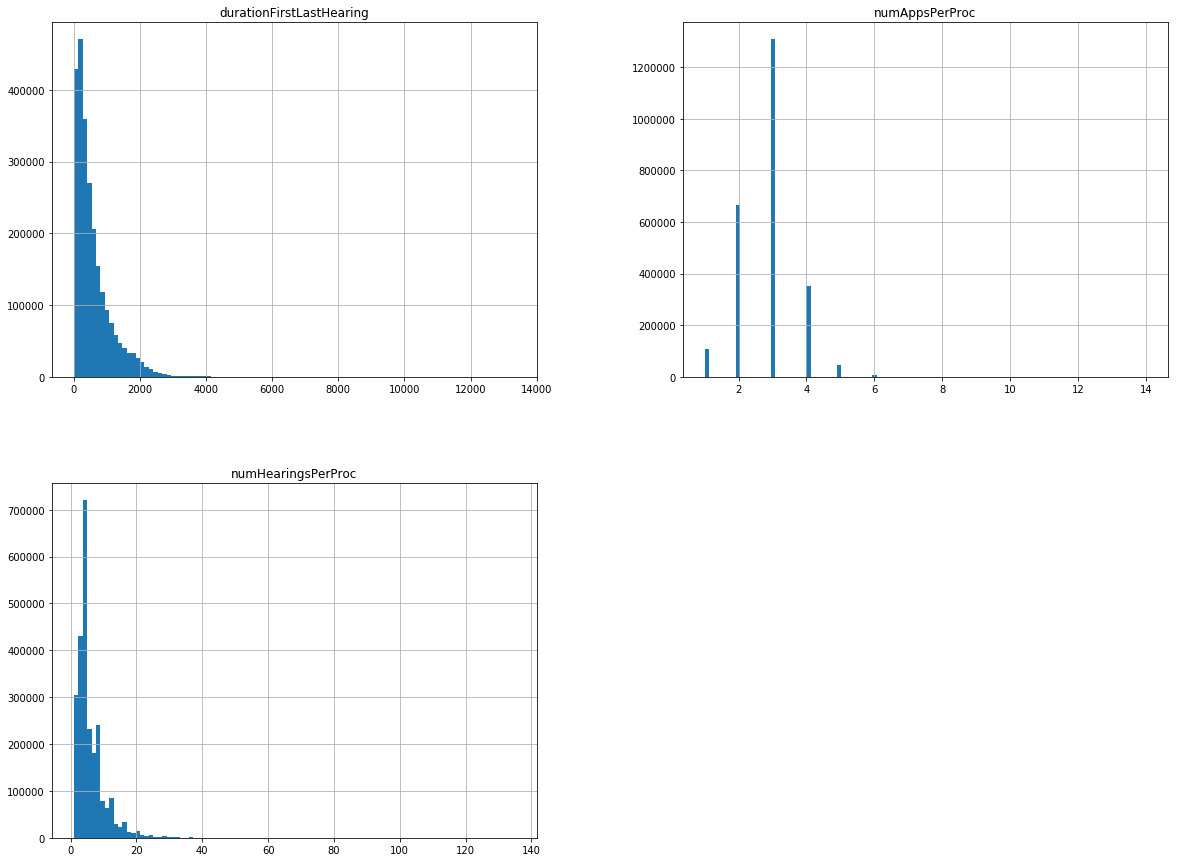

In [33]:
merged_sched_master.hist(bins=100, column=['numAppsPerProc', 'numHearingsPerProc', 'durationFirstLastHearing'], figsize=(20, 15))
plt.show()

## Selecting the last hearing for each idncase

In [34]:
merged_sched_master = merged_sched_master.groupby(['idncase', 'idnproceeding'], as_index=False).last()

## Histogram of numerical features

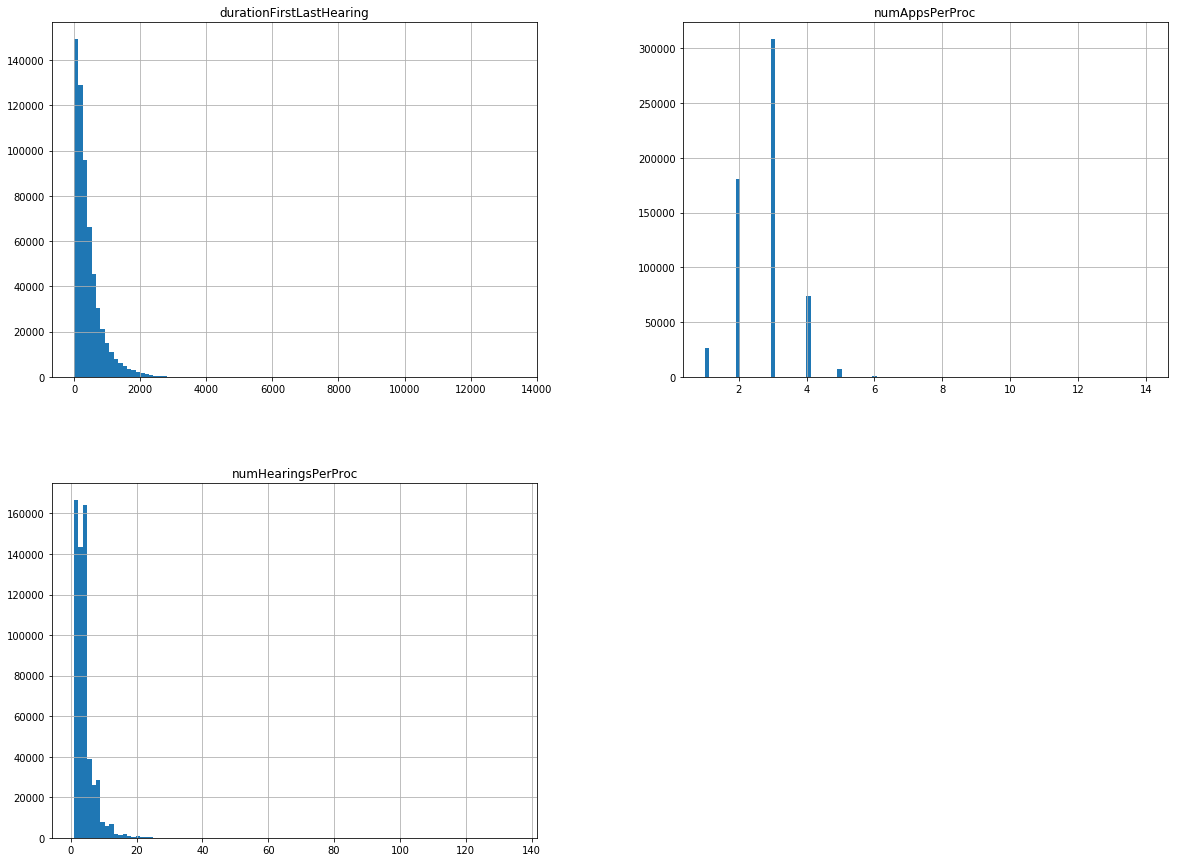

In [35]:
merged_sched_master.hist(bins=100, column=['numAppsPerProc', 'numHearingsPerProc', 'durationFirstLastHearing'], figsize=(20, 15))
plt.show()

## Number of applications/proceeding v.s grant rate

In [41]:
numApp_grantRate = merged_sched_master.groupby(['numAppsPerProc', 'dec'])['dec'].count()

In [44]:
numApp_grantRate = numApp_grantRate.groupby(level=0).apply(lambda x: x / x.sum())
numApp_grantRate

numAppsPerProc  dec  
1.0             DENY     0.32458
                GRANT    0.67542
2.0             DENY     0.55957
                GRANT    0.44043
3.0             DENY     0.68922
                GRANT    0.31078
4.0             DENY     0.73098
                GRANT    0.26902
5.0             DENY     0.74489
                GRANT    0.25511
6.0             DENY     0.82381
                GRANT    0.17619
7.0             DENY     0.88764
                GRANT    0.11236
8.0             DENY     0.86000
                GRANT    0.14000
9.0             DENY     0.77778
                GRANT    0.22222
10.0            DENY     1.00000
11.0            DENY     0.50000
                GRANT    0.50000
12.0            GRANT    1.00000
13.0            DENY     1.00000
14.0            DENY     1.00000
Name: dec, dtype: float64

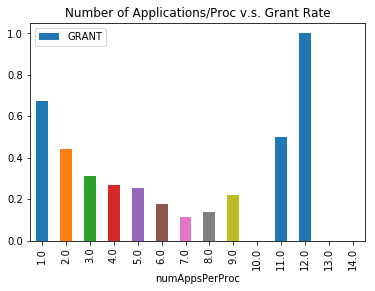

In [54]:
numApp_grantRate.unstack().reset_index().plot(x='numAppsPerProc', y='GRANT', kind='bar', title='Number of Applications/Proc v.s. Grant Rate')

## Number of days elapsed between first and last hearing v.s grant rate

In [63]:
# getting rid of the rows where days elapsed is greater than 2000
durationFirstLastHearing_grantR = merged_sched_master[merged_sched_master.durationFirstLastHearing < 2000]

In [64]:
# binning days elapsed into incremental periods of 3 months 
durationFirstLastHearing_grantR['rangeInc90'] = pd.cut(durationFirstLastHearing_grantR['durationFirstLastHearing'], np.arange(0, 2000, 90))

/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
durationFirstLastHearing_grantR = durationFirstLastHearing_grantR.groupby(['rangeInc90', 'dec'])['dec'].count()

In [68]:
durationFirstLastHearing_grantR = durationFirstLastHearing_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [69]:
durationFirstLastHearing_grantR

rangeInc90    dec  
(0, 90]       DENY     0.69077
              GRANT    0.30923
(90, 180]     DENY     0.67356
              GRANT    0.32644
(180, 270]    DENY     0.65092
              GRANT    0.34908
(270, 360]    DENY     0.63074
              GRANT    0.36926
(360, 450]    DENY     0.62086
              GRANT    0.37914
(450, 540]    DENY     0.60059
              GRANT    0.39941
(540, 630]    DENY     0.57677
              GRANT    0.42323
(630, 720]    DENY     0.56599
              GRANT    0.43401
(720, 810]    DENY     0.55471
              GRANT    0.44529
(810, 900]    DENY     0.55605
              GRANT    0.44395
(900, 990]    DENY     0.55654
              GRANT    0.44346
(990, 1080]   DENY     0.56539
              GRANT    0.43461
(1080, 1170]  DENY     0.55539
              GRANT    0.44461
(1170, 1260]  DENY     0.55831
              GRANT    0.44169
(1260, 1350]  DENY     0.54614
              GRANT    0.45386
(1350, 1440]  DENY     0.53900
              GRANT

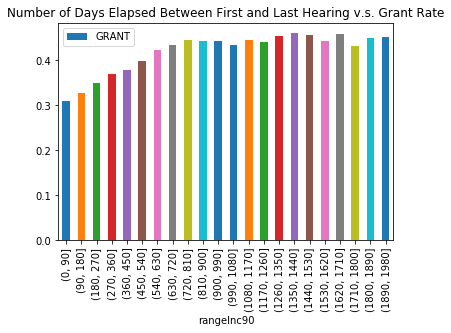

In [71]:
durationFirstLastHearing_grantR.unstack().reset_index().plot(x='rangeInc90', y='GRANT', kind='bar', title='Number of Days Elapsed Between First and Last Hearing v.s. Grant Rate')

## Number of hearings/proceeding v.s. grant rate

In [72]:
# getting rid of rows where there are more than 20 hearings 
numHearing_grantR = merged_sched_master[merged_sched_master.numHearingsPerProc < 20]

In [74]:
numHearing_grantR = numHearing_grantR.groupby(['numHearingsPerProc', 'dec'])['dec'].count()

In [75]:
numHearing_grantR = numHearing_grantR.groupby(level=0).apply(lambda x: x / x.sum())

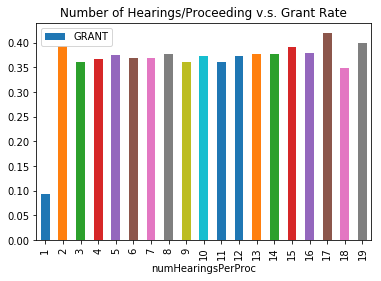

In [77]:
numHearing_grantR.unstack().reset_index().plot(x='numHearingsPerProc', y='GRANT', kind='bar', title='Number of Hearings/Proceeding v.s. Grant Rate')

In [ ]:
sched_tbl = pd.read_csv(path + '/tbl_schedule.csv', low_memory=False)

In [ ]:
sched_tbl.head(5)